# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Сбор и анализ данных.
### Куринова Ксения, Б05-011

### Задача 1.

На занятии мы уже <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/titanik.html" target="_blank">начинали</a> работать с датасетом Титаник. Сейчас наша задача &mdash; на основе простого анализа предоставленных данных получить некоторое приближенное правило определения, выжил пассажир или нет.

#### 1. Подготовка данных

Добавим данные с помощью `pandas`, выведем в качестве подтверждения:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid', font_scale=1.3, palette='Set2', rc={'figure.figsize':(8.36,5.789)})
%matplotlib inline

In [2]:
data = pd.read_csv('titanik.csv', index_col=0)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Разделим данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [3]:
train = data.sample(frac = 0.7)
test = data.drop(train.index)

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак. Применим к обеим частям таблицы функцию ниже

In [4]:
features_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target_column = 'Survived'  # Целевой признак


def get_features_and_target(data):
    features = data[features_columns]
    target = data[target_column]
    return features, target


features_train, target_train = get_features_and_target(train)
features_test, target_test = get_features_and_target(test)

#### 2. Исследование

Рассмотрим зависимость выживаемости от пола человека:

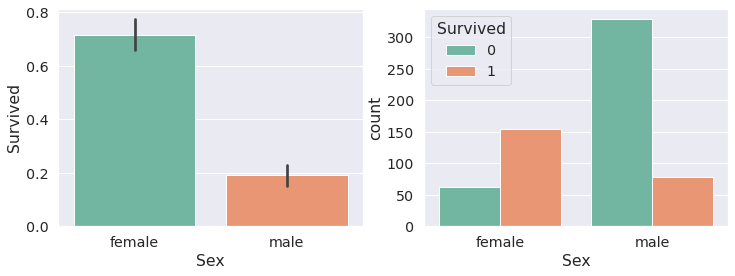

In [5]:
plt.rcParams["figure.figsize"] = (12, 4)
plt.subplot (1, 2, 1)
barplot_sex = sns.barplot(x=features_train['Sex'], y=target_train)
plt.subplot (1, 2, 2)
countplot_sex = sns.countplot(x=features_train['Sex'], hue=target_train)
plt.show(barplot_sex, countplot_sex)

Таким образом, выжило больше женщин, чем мужчин. Рассмотрим зависимость целевого признака от возраста пассажира, разбив его на категории:

In [6]:
if 'Age category' not in features_train:
    features_train.insert(len(features_train.columns),
                          'Age category',
                          pd.cut(features_train.Fare, bins=[0, 10, 20, 35, 50, 100]))

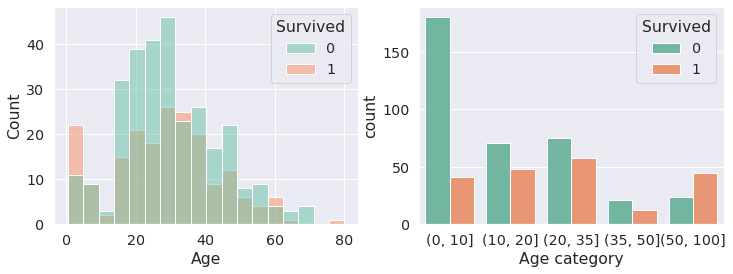

In [7]:
plt.subplot (1, 2, 1)
sns.histplot(x=features_train['Age'], hue=target_train)
plt.subplot (1, 2, 2)
sns.countplot(x=features_train['Age category'], hue=target_train)
plt.show()

Рассмотрим зависимость целевого признака от класса каюты пассажира :

<AxesSubplot:xlabel='Pclass', ylabel='count'>

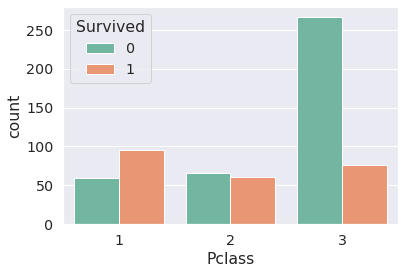

In [8]:
plt.rcParams["figure.figsize"] = (6, 4)
sns.countplot(x=features_train['Pclass'], hue=target_train)

Таким образом, среди пассажиров первого и второго класса процент выживших сущеcтвенно больше, чем у пассажиров третьего.

Рассмотрим количество членов семьи пассажиров, изобразив отдельно количество сиблингов и количество родителей+детей:

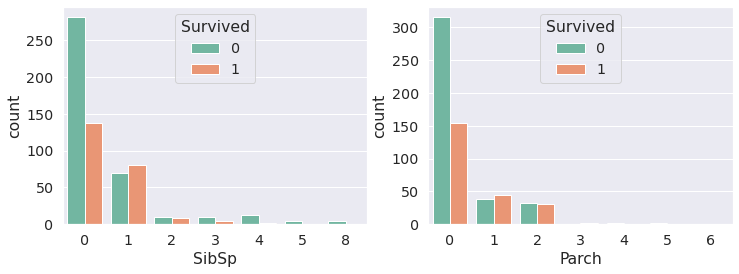

In [9]:
plt.rcParams["figure.figsize"] = (12, 4)

plt.subplot (1, 2, 1)
sns.countplot(x=features_train['SibSp'], hue=target_train)
plt.subplot (1, 2, 2)
sns.countplot(x=features_train['Parch'], hue=target_train)
plt.show()

Заметим, что шансы на выживание резко падают, если у пассажира было более трёх родственников на борту.

Разделим оплату пассажира за билет на несколько тарифов. Разделение на категории используется для повышения информативности графика.

<AxesSubplot:xlabel='Price', ylabel='count'>

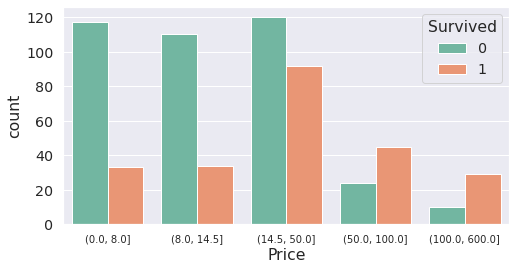

In [10]:
plt.rcParams["figure.figsize"] = (8, 4)

if 'Price' not in features_train:
    features_train.insert(len(features_train.columns),
                          'Price',
                          pd.cut(features_train.Fare, bins=[0, 8, 14.5, 50, 100, 600]))
plt.xticks(size=10)
sns.countplot(x=features_train['Price'], hue=target_train)

Таким образом, чем дороже билет пассажира, тем выше его шансы на выживание. 

Рассмотрим, как связаны количество родственников, пол и класс пассажира. Ограниченный масштаб по оси y выберем для информативности графика: погибло более 150 мужчин из третьего класса.

(0.0, 50.0)

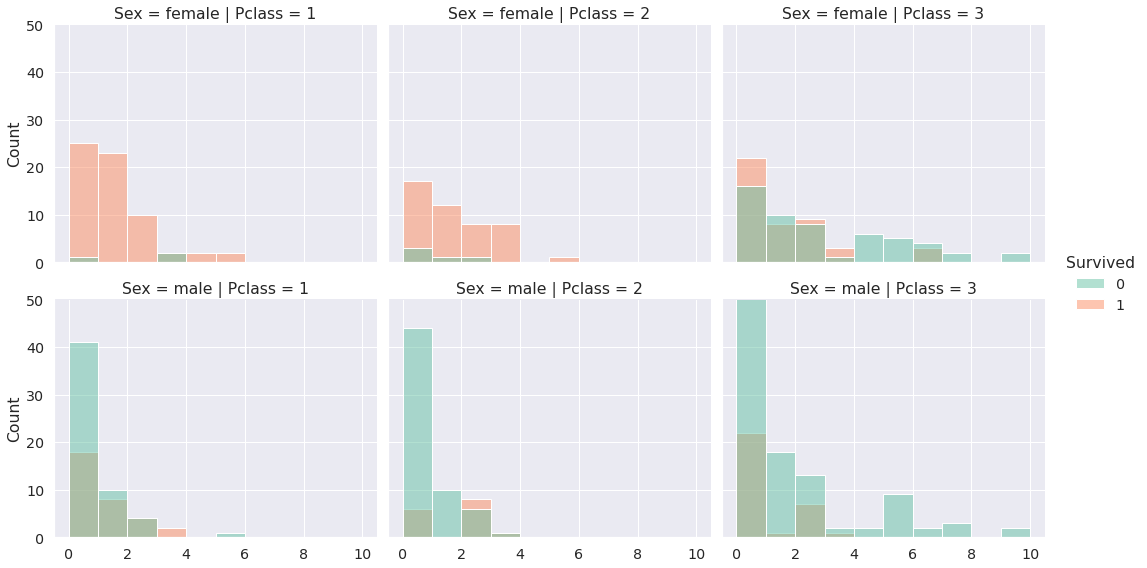

In [11]:
ax = sns.displot(features_train, binwidth=1,
            height=4, x=features_train['Parch']+features_train['SibSp'],
            hue=target_train, col="Pclass",
            row="Sex", aspect=1.25)

plt.ylim(0, 50)

Рассмотрим более детально связь между признаками:

<AxesSubplot:>

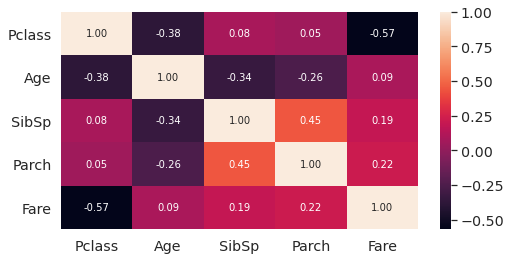

In [12]:
corr = features_train.corr()
sns.heatmap(corr, annot=True, fmt=".2f")

#### 3. Классификация

**Дерево 1:**

Как мы видим, пол является одним из наиболее выразительных признаков. Первое дерево предсказывает исход, анализируя пол человека.

**Дерево 2:**

В следующем дереве мы считаем, что если возраст человека лежит в $[20, 35]$, то он не выживет. Иначе, если он не находится в каюте третьего класса, он останется жив.
Заметим, что чтобы исход был положительным, необходимо, чтобы возраст человека был 

In [13]:
def first_tree(features):
    predicted = pd.Series(features['Sex']).map(lambda x: 1 if (x == 'female') else 0)
    return predicted


def second_tree(features):
    age = pd.Series(features['Age']).map(lambda x: 0 if (20 <= x and x <= 35) else 1)
    pclass = pd.Series(features['Pclass']).map(lambda x: 1 if (x != 3) else 0)
    
    # человеку одновременно не 20-30 лет и он едет не третьим классом
    predicted = pd.Series(pclass * age)

    return predicted

#### 4. Качество

Вспомним, что у нас имеется тестовая часть выборки. Самое время ее использовать для того, чтобы оценить, насколько хорошими получились деревья. Предложите какой-нибудь критерий качества.

*Замечание*. Не стоит пытаться искать, какие критерии существуют. В данном случае легко предложить адекватный критерий. Стандартные критерии мы разберем позже, но для начала лучше подумать самостоятельно.

**Критерий:**

В качестве критерия выберем отношение $$\frac{число\;верных\;предсказаний}{число\;предсказаний}.$$

Таким образом, в идеальном случае ```criteria``` вернёт $1$.

In [14]:
def criteria(target, predicted):
    total_count = len(target)
    true_count = total_count - sum(abs(target-predicted))
    return true_count/total_count

Оценим качество первого и второго деревьев:

In [15]:
criteria(first_tree(features_test), target_test)

0.8127340823970037

In [16]:
criteria(second_tree(features_test), target_test)

0.6067415730337079

#### 5. Выводы
1. Женщины выживают лучше, впрочем, как и старики.
2. Чем дороже билет и выше класс пасажира, тем лучше его шансы на выживание.
3. Процент погибших детей очень высок.
4. По последнему графику видно, что для пассажиров класса выгодно иметь на борту пару родственников. Большое количество родственников на борту отрицательно влияет на выживаемость. Данный признак, как подтверждает диаграмма, слабо связан с классом пассажира.
5. Возраст хорошо коррелирует с ценой билета пассажира и классом его поездки.
6. Так же хорошо коррелируют плата за проезд и класс каюты (очевидно :)).

В целом, все утверждения подтверждаются историческими фактами: женщин и стариков сажали в шлюпки первыми, а младенцы плохо переносили холодную воду. Большое количество родственников на борту мешает действовать во благо своего спасения. Каюты с дешёвыми билетами (третьего класса) находились внизу и начали наполняться водой первыми.

Люди старшего возраста могли позволить себе более дорогие билеты, нежели молодёжь, а значит, их шанс оказаться на более высоком уровне каюты был выше.

Пол, каюта и возрастная категория человека с хорошей вероятностью прогнозируют целевой признак.

### Задача 2

<a target="_blank" href="yelp.com">Yelp</a> — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

Нам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

**Что нужно сделать:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. <a target="_blank" href="https://yandex.ru/company/researches/2017/msk_mobile_map">Пример</a> с несколько другой задачей.
* А также найти рестораны с наилучшими отзывами.

#### Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [17]:
business = pd.read_csv('yelp_business.csv')
business.head()

,Unnamed: 0,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories
0,0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,1,Dentists;General Dentistry;Health & Medical;Or...
1,1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1,Departments of Motor Vehicles;Public Services ...
3,3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,0,Sporting Goods;Shopping
4,4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. В таблице должен быть указан город (название) и количество компаний в этом городе.

In [18]:
cities = business.groupby('city').count().sort_values('business_id', ascending = False)
cities.reset_index(inplace = True)
cities.loc[:, ['city','business_id']].head()

,city,business_id
0,Las Vegas,26775
1,Phoenix,17213
2,Toronto,17206
3,Charlotte,8553
4,Scottsdale,8228


Пусть `N` &mdash; город с наибольшим количеством компаний. Оставьте в таблице только записи, соответствующие городу `N`. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ &mdash; широту.

In [19]:
target_city = cities['city'][0]
print(target_city)
business = business[business['city'] == target_city]
business.drop('city', axis=1, inplace=True)

Las Vegas


Text(0.5, 1.0, 'Месторасположение компаний, соотв. N')

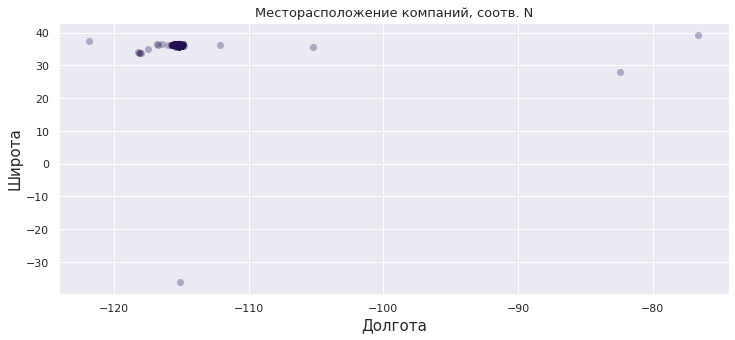

In [20]:
sns.set(palette='magma')
plt.figure(figsize = (12, 5))
sns.scatterplot(data=business, x="longitude", y="latitude", s=50, linewidth=0, alpha=0.3)
plt.xlabel('Долгота', fontsize = 15)
plt.ylabel('Широта', fontsize = 15)
plt.title('Месторасположение компаний, соотв. N', fontsize = 13)

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. 

На этом графике должны выделяться некоторые улицы. Откройте карту города `N` и сравните ее с построенным графиком.

Text(0.5, 1.0, 'Компании вблизи города N')

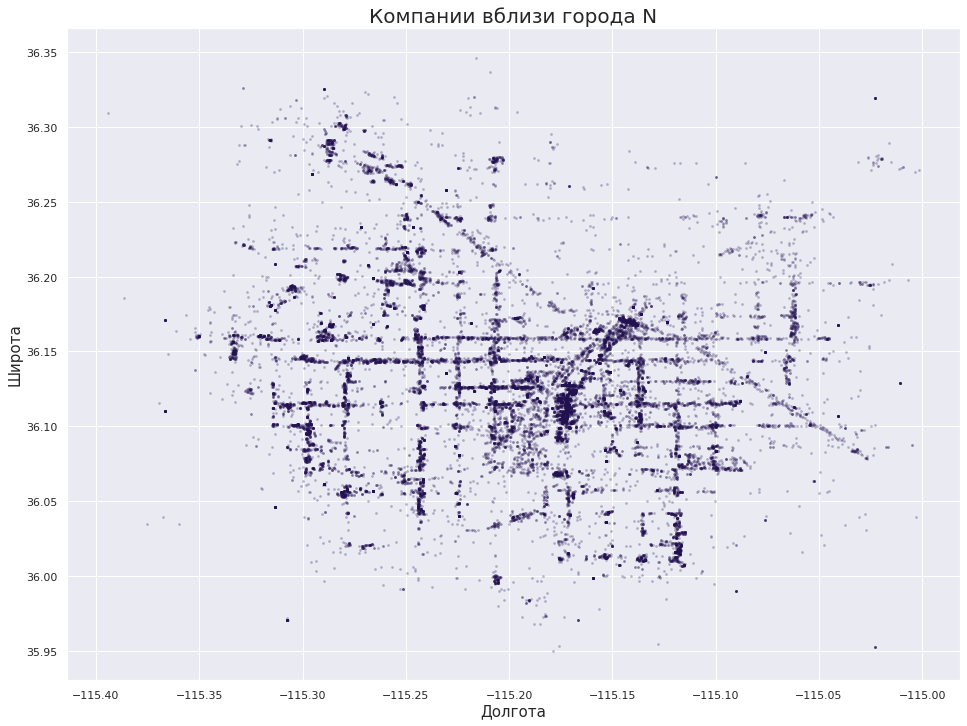

In [21]:
plt.figure(figsize = (16, 12))
# обрезаем данные по широте
business = business[(business['longitude'] <= -115.0) & (business['longitude'] >= -115.4)]
business = business[(business['latitude'] >= 35.95) & (business['latitude'] <= 36.35)]

sns.scatterplot(data=business, x="longitude", y="latitude", s=7, linewidth=0, alpha=0.3)
plt.xlabel('Долгота', fontsize = 15)
plt.ylabel('Широта', fontsize = 15)

plt.title('Компании вблизи города N', fontsize = 20)

#### Сравнение с физической картой Лос-Анжелеса (города N) показало визуальное совпадение рассматриваемых данных с реальной картиной.

#### Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [22]:
review = pd.read_csv('yelp_review.csv')

В подгруженной таблице оценок оставьте только компании города `N`. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`. 

*Подсказка.* Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [23]:
review.set_index('business_id')
review = review.loc[review.loc[:, 'business_id'].isin(business['business_id'])]

Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. 

*Подсказка.* Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [24]:
marks = review.groupby(['business_id']).aggregate([np.mean, np.size])

Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы. Красивые имена &mdash; то, что будет понятно простому человеку при чтении ваших результатов. Как именно их назвать &mdash; задача аналитика, то есть в данном случае ваша :)

In [25]:
yelp_marks = marks['stars']
yelp_marks.columns = ['mean rating', 'marks number']
yelp_marks.reset_index(inplace=False).head()

,business_id,mean rating,marks number
0,--9e1ONYQuAa-CB_Rrw7Tw,4.088904,1451
1,--DdmeR16TRb3LsjG0ejrQ,3.200000,5
2,--WsruI0IGEoeRmkErU5Gg,4.928571,14
3,--Y7NhBKzLTbNliMUX_wfg,4.875000,8
4,--e8PjCNhEz32pprnPhCwQ,3.473684,19


Соедините две полученные ранее таблицы по компаниям города `N` в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index`. В одной из них это уже должно было быть сделано.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, `stars`, `count`.

In [26]:
merged = business.set_index('business_id')
merged = merged.join(yelp_marks)

Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$.

Text(0.5, 1.0, 'Компании вблизи города N')

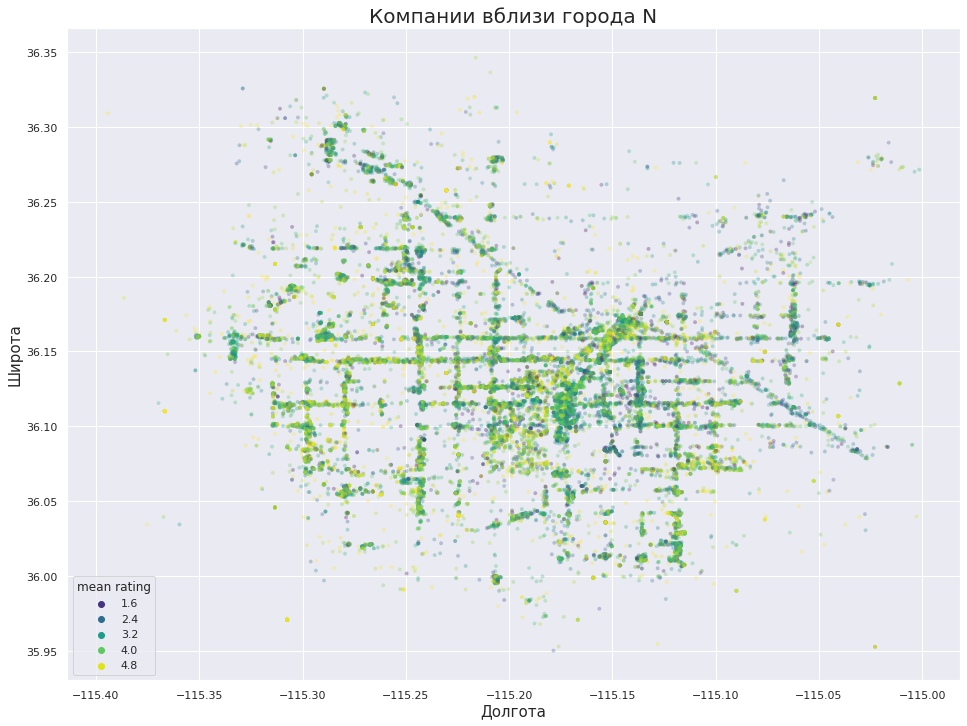

In [27]:
plt.figure(figsize = (16, 12))
fig = sns.scatterplot(
    data=merged,
    x='longitude',
    y='latitude',
    s=15,
    linewidth=0, 
    hue='mean rating',
    palette='viridis',
    alpha=0.3,
    )

plt.xlabel('Долгота', fontsize = 15)
plt.ylabel('Широта', fontsize = 15)
plt.title('Компании вблизи города N', fontsize = 20)

Чтобы получить районы города, то есть разделить город на "клетки", округлите значения широты и долготы, подобрав оптимальный размер района. 

In [28]:
# сохраняю данные для дальнейшего построения
merged_tmp = merged.copy()

merged['latitude'] = np.round(merged['latitude'] * 4, decimals = 1) * 0.25
merged['longitude'] = np.round(merged['longitude'] * 4, decimals = 1) * 0.25

Для получения средней оценки компании по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений &mdash; оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

Text(120.5, 0.5, 'Широта')

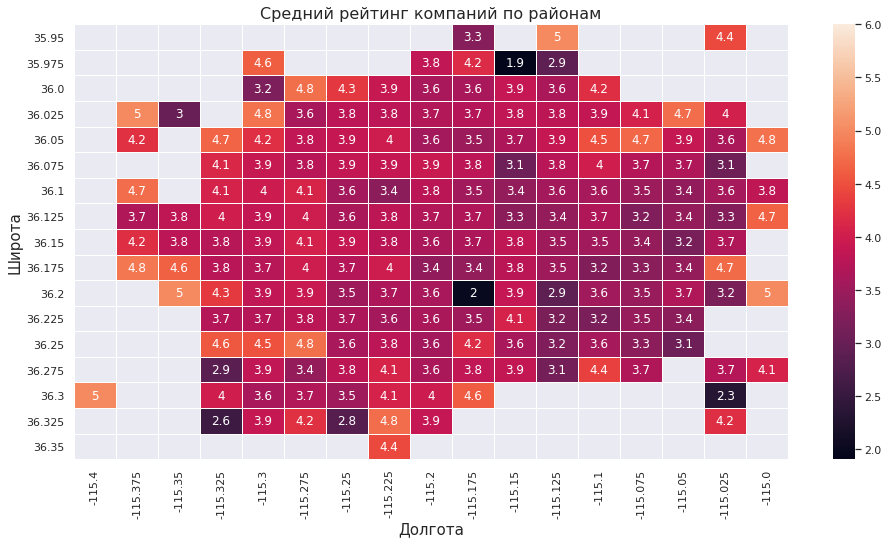

In [29]:
districts = merged.pivot_table(values='mean rating', index='latitude',
                               columns='longitude', aggfunc=np.mean)

sns.set(rc={'figure.figsize':(16,8)})
sns.heatmap(districts, vmax=6, annot=True, linewidths=.5)

plt.title('Средний рейтинг компаний по районам', fontsize = 16)
plt.xlabel('Долгота', fontsize = 15)
plt.ylabel('Широта', fontsize = 15)

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:** 
1) Могут случаться выбросы величин, мешающие качественному анализу. 

2) Оценки могут портить визуальную картину, например, маленькое количество цветов может красить весь график в очень похожие цвета.

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

Text(120.5, 0.5, 'Широта')

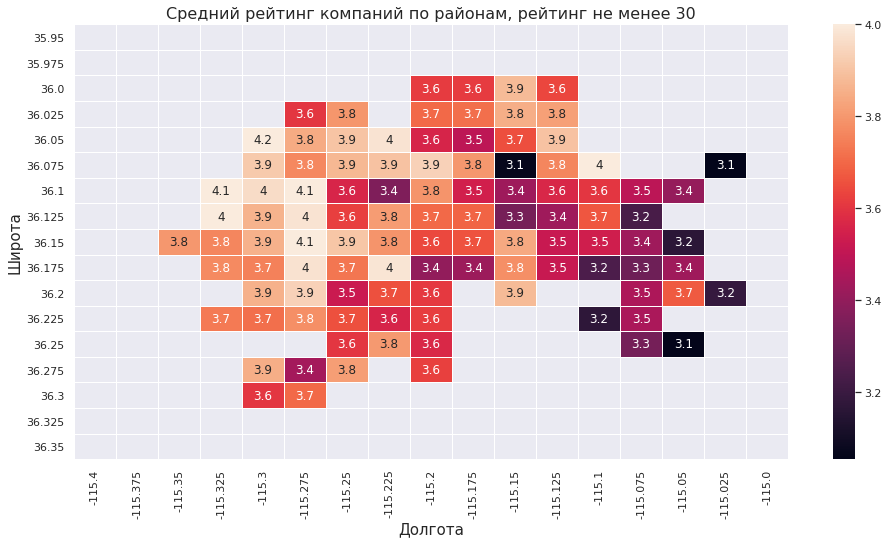

In [30]:
pivot_districts = \
    merged.reset_index(inplace=False).pivot_table(values='business_id',index='latitude',
                                                  columns='longitude', aggfunc=len)
districts = districts[pivot_districts >= 30]
sns.heatmap(districts, vmax=4, annot=True, linewidths=.5)

plt.title('Средний рейтинг компаний по районам, рейтинг не менее 30', fontsize = 16)
plt.xlabel('Долгота', fontsize = 15)
plt.ylabel('Широта', fontsize = 15)

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** 
1) Число районов сократилось, выборка стала более репрезентативной

2) С помощью команд vmin и vmax удалось улучшить график, можно говорить о том, что разброс рейтинга между компаниями невелик в пределах города. Но районы, находящиеся правее (имеющие бОльшую долготу) в среднем имеют более средние оценки, нежели те, что находятся левее.

#### Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `restaurant`. Обратите внимание, что в анализе данных часто нет четкого формата данных. Например, данное слово может быть написано как с большой буквы, так и с маленькой; может как разделяться `;`, так и не разделяться. При возникновении недопонимания стоит посмотреть данные.

Составьте таблицу, в которой будет информация о всех ресторанах города `N`, для которых имеется не менее $5$ отзывов. Сделаем отбор данных:

In [31]:
# точные данные без округления
restaurants_tmp = merged_tmp.loc[merged_tmp['categories'].str.contains('Restaurant', regex=True)]
restaurants_tmp.reset_index(inplace = True)
restaurants_tmp = restaurants_tmp.loc[restaurants_tmp['marks number'] >= 5]
# данные для рейтинга
restaurants = merged.loc[merged['categories'].str.contains('Restaurant', regex=True)]
restaurants.reset_index(inplace = True)
restaurants = restaurants.loc[restaurants['marks number'] >= 5]

Далее постройте heatmap-график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.
Построим сводные таблицы:

In [32]:
popular_districts = restaurants.pivot_table(values='mean rating',
        index='latitude', columns='longitude', aggfunc=np.mean)
popular_districts = popular_districts[pivot_districts >= 10]

pivot_districts = restaurants.pivot_table(values='business_id',
        index='latitude', columns='longitude', aggfunc=len)

Зададим параметры графика:

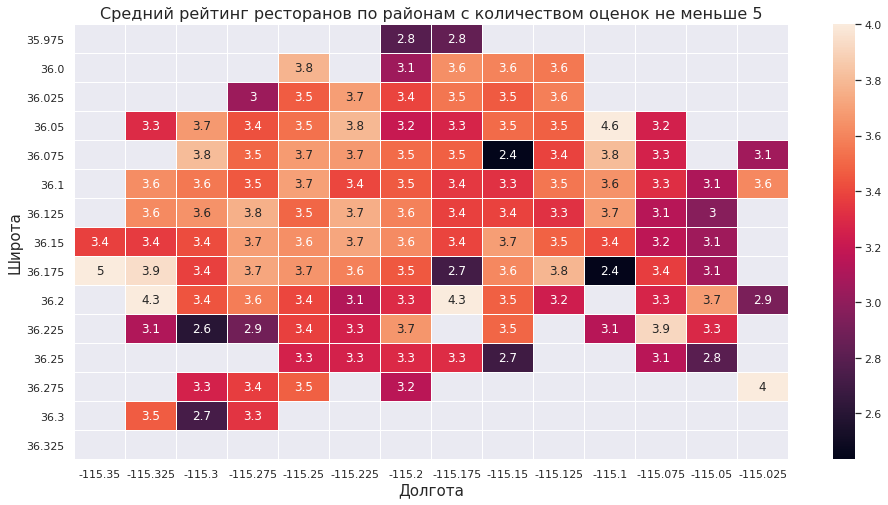

In [33]:
sns.heatmap(popular_districts, vmax=4, annot=True, linewidths=.5)

plt.title('Средний рейтинг ресторанов по районам с количеством оценок не меньше 5', fontsize = 16)
plt.xlabel('Долгота', fontsize = 15)
plt.ylabel('Широта', fontsize = 15)
plt.show()

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:**
Данный отбор позволяет избавиться от выбросов, которые могут исказить картину аналитики.

## Кот Василий

Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [34]:
restaurants = restaurants_tmp.loc[restaurants_tmp['marks number'] >= 50].sort_values('mean rating', 
                                                                                      inplace=False,
                                                                                      ascending = False)
top = restaurants.head(10)
top

,business_id,Unnamed: 0,name,neighborhood,address,state,postal_code,latitude,longitude,is_open,categories,mean rating,marks number
777,iBPyahdJRP5y0t25fF2W9w,22863,"""Lip Smacking Foodie Tours""",The Strip,"""3635 Las Vegas Blvd S""",NV,89109,36.114537,-115.172678,1,Food Tours;Restaurants;Event Planning & Servic...,4.966480,179
5579,Fmij544FE1iOruoxI41kew,165971,"""Pepito Shack""",Downtown,"""1516 S Las Vegas Blvd""",NV,89104,36.152477,-115.151945,0,Restaurants;Burgers;Food Stands;Sandwiches;Hot...,4.907692,65
3680,qw9SyduMZ53KB6GlBQqvZQ,109391,"""Bosa Boba Cafe""",Chinatown,"""3355 Spring Mountain Rd, Ste 35""",NV,89102,36.125960,-115.184846,1,Vietnamese;Bubble Tea;Sandwiches;Food;Coffee &...,4.890909,55
5657,k9b96JXlNewj36ddrce9Jw,167803,"""Garden Grill""",Westside,"""302 S Rampart Blvd""",NV,89145,36.166783,-115.286197,1,Tacos;Street Vendors;Farmers Market;Vegetarian...,4.868132,91
446,IhNASEZ3XnBHmuuVnWdIwA,13577,"""Brew Tea Bar""",Southwest,"""7380 S Rainbow Blvd, Ste 101""",NV,89139,36.054195,-115.242443,1,Cafes;Tea Rooms;Food;Bubble Tea;Restaurants;De...,4.848069,1165
4207,k5ddmLvAKKw9zSusRPM2cQ,124895,"""Poppa Naps BBQ""",Eastside,"""""",NV,89121,36.116549,-115.088115,1,Food Stands;Hot Dogs;Caterers;Restaurants;Amer...,4.836538,104
2672,8fFTJBh0RB2EKG53ibiBKw,78897,"""Zenaida's Cafe""",Eastside,"""3430 E Tropicana Ave, Ste 32""",NV,89121,36.101741,-115.100359,1,Restaurants;Breakfast & Brunch;Cafes,4.833333,180
2642,l1GJnB9TJgGgEeI4at1M0A,78362,"""El Frescos Cocina Mexicana""",Southeast,"""5030 Paradise Rd, Ste B""",NV,89119,36.098527,-115.148446,0,Caterers;Mexican;Restaurants;Food;Event Planni...,4.816754,191
1149,hFT3HuxVZJb1uYEsYfp-0A,34418,"""Blaqcat Ultra Hookah Lounge""",Westside,"""6340 W Charleston Blvd, Ste 140""",NV,89146,36.159742,-115.232738,1,Adult Entertainment;Lounges;Hookah Bars;Restau...,4.809524,63
5557,1CaM8eIvl41l4f3V-V-cAw,165247,"""Smooth Eats""",Downtown,"""124 S 6th St, Ste 160""",NV,89101,36.167894,-115.140238,1,Juice Bars & Smoothies;Restaurants;Sandwiches;...,4.807018,57


Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

In [35]:
restaurants = restaurants[restaurants['mean rating'] >= 4.7]
# убираем топовые рестораны
restaurants = restaurants.loc[~restaurants.loc[:, 'business_id'].isin(top['business_id'])]

Text(0, 0.5, 'Широта')

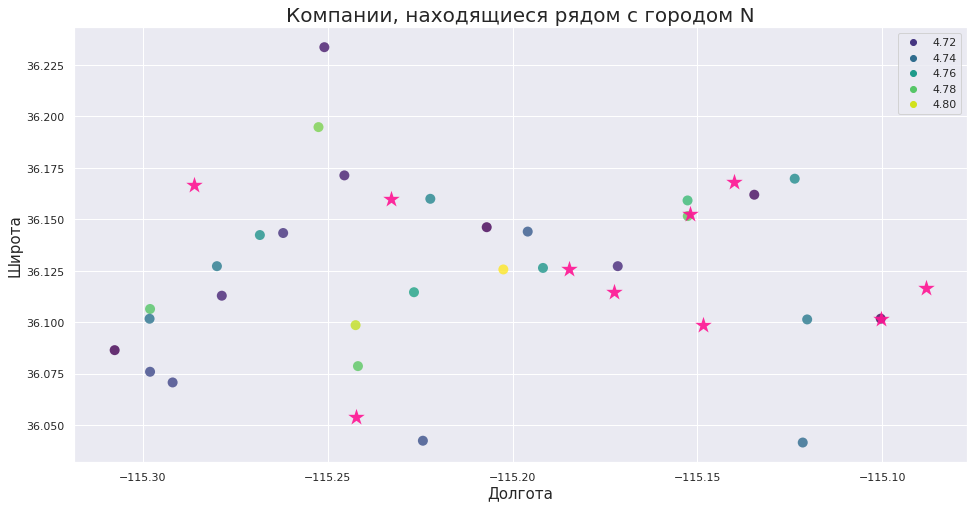

In [37]:
plt.title('Компании, находящиеся рядом с городом N', fontsize = 20)

sns.scatterplot(
    data=restaurants,
    x='longitude',
    y='latitude',
    s=100,
    linewidth=0, 
    hue='mean rating',
    palette='viridis',
    alpha=0.8,
    )

# добавляем лучшие рестораны
sns.scatterplot(
    data=top,
    x='longitude',
    y='latitude',
    s=300,
    linewidth=0, 
    color='deeppink',
    alpha=0.9,
    marker='*'
    )

plt.xlabel('Долгота', fontsize = 15)
plt.ylabel('Широта', fontsize = 15)

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:**
1. Городом с наибольшим числом компаний (a.k.a город N) является Лас-Вегас. Данные по предприятиям хорошо легли на реальную физическую карту.
2. У районов с достаточным количеством компаний рейтинг не имеет сильных перепадов. В центральной части рассматриваемой области находятся лучшие рестораны.
3. Кот Василий предпочитает лучшие рестораны в широтах $36.100-36.175$.
4. При сравнении с реальной картой выяснилось, что рестораны с более высоким рейтингом и количеством отзывов лежат ближе к центру города, что естественно связано с посещаемостью данных точек.